In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [3]:
depths = [1, 2, 3]
results = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    results.append((d, train_acc, test_acc))

# Print results
for d, train_acc, test_acc in results:
    print(f"Depth={d}: Train Acc={train_acc:.3f}, Test Acc={test_acc:.3f}")


Depth=1: Train Acc=0.667, Test Acc=0.667
Depth=2: Train Acc=0.971, Test Acc=0.889
Depth=3: Train Acc=0.981, Test Acc=0.978


In [5]:
#1.	Use sklearn.neighbors.KNeighborsClassifier on the Iris dataset (only 2 features: sepal length, sepal width).

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]   # only sepal length and sepal width
y = iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [7]:

#2.	Train models with k=1,3,5,10.

ks = [1, 3, 5, 10]
classifiers = {}

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    classifiers[k] = clf

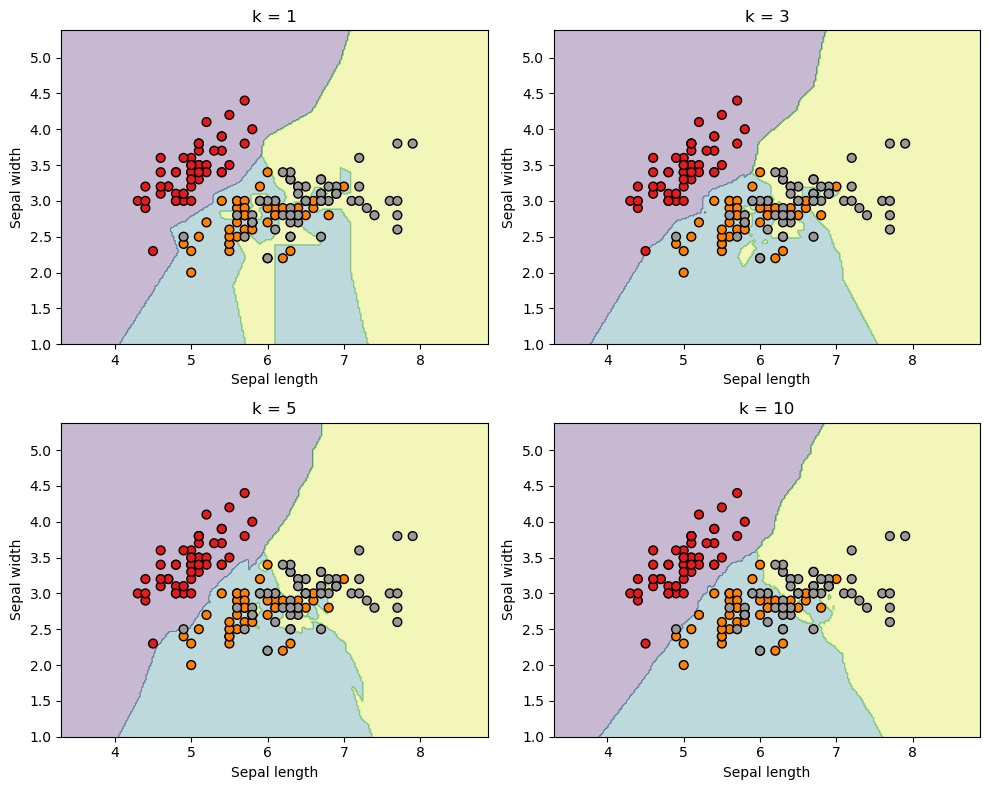

In [11]:
#3.	Plot the decision boundaries for each k.

# Define plotting function
def plot_decision_boundary(clf, X, y, k, ax):
    # Create meshgrid
    h = 0.02
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3)
    scatter = ax.scatter(X[:,0], X[:,1], c=y, edgecolor="k", s=40, cmap=plt.cm.Set1)
    ax.set_title(f"k = {k}")
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")

# Plot for each k
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

for i, k in enumerate(ks):
    plot_decision_boundary(classifiers[k], X, y, k, axes[i])

plt.tight_layout()
plt.show()


In [14]:
#1. Train a kNN Classifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train KNN (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


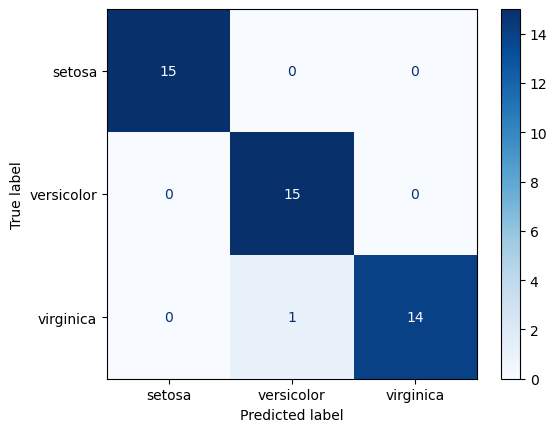

In [16]:
#Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [18]:
#Accuracy, Precision, Recall, F1

from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



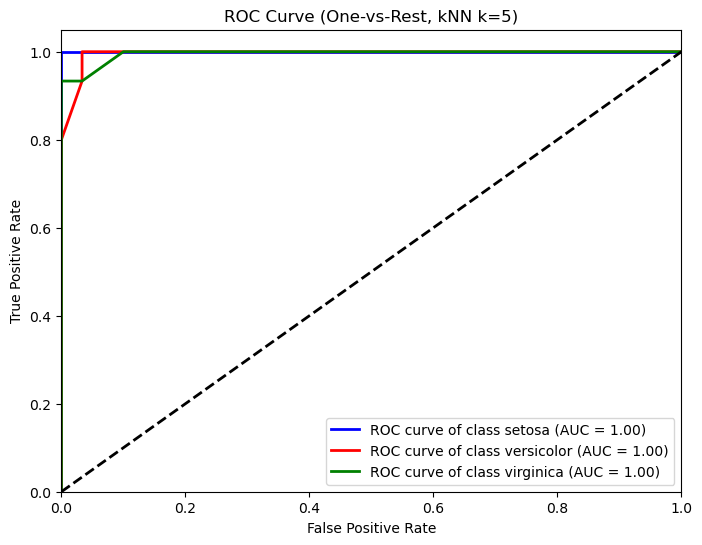

In [20]:
#4. ROC Curve & AUC (multi-class).For multi-class, we use One-vs-Rest (OvR).

# Binarize labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Predict probabilities
y_score = knn.predict_proba(X_test)

# Compute ROC curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ["blue", "red", "green"]
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest, kNN k=5)")
plt.legend(loc="lower right")
plt.show()
